# Demo with Editing Dependencies

This is a quick demo for a situation where you may want to edit the dependencies AutoNormalize discovers. In this example, extra dependencies are detected due to lack of data. 

In [28]:
import pandas as pd
import autonormalize as an

In [29]:
rows = [['tigers', 'boston', 'MA', 20],
       ['elephants', 'chicago', 'IL', 21],
       ['foxes', 'miami', 'FL', 20],
       ['snakes', 'austin', 'TX', 20],
       ['dolphins', 'honolulu', 'HI', 19],
       ['eagles', 'houston', 'TX', 21]]
df = pd.DataFrame(rows, columns=['team', 'city', 'state', 'roster_size'])
df

,team,city,state,roster_size
0,tigers,boston,MA,20
1,elephants,chicago,IL,21
2,foxes,miami,FL,20
3,snakes,austin,TX,20
4,dolphins,honolulu,HI,19
5,eagles,houston,TX,21


As you can see, because we have such little data, there is only one team represented per city. Logically, we know that there can be more than one team per city, but the algorithm doesn't. Thus it detects the dependencies {city} --> team, and {city} --> roster_size. 

In [25]:
deps = an.find_dependencies(df)
print(deps)

100%|██████████| 2/2 [00:00<00:00, 141.40it/s]

 {city}  --> team
 {team}  --> city
 {team}  {city}  --> state
 {team}  {city}  --> roster_size


Because we logically know this is incorrect, we just remove these dependencies before proceeding to normalization and creating our `EntitySet`.

In [26]:
deps.remove_dep('team', ['city'])
deps.remove_dep('roster_size', ['city'])
print(deps)

 --> team
 {team}  --> city
 {team}  {city}  --> state
 {team}  --> roster_size


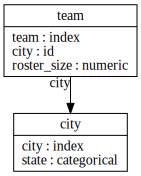

In [27]:
es = an.make_entityset(df, deps)
es.plot()